# SAS 해커톤에 쓰일 dummy data maker

In [19]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=10)
from faker import Faker
fake_ko = Faker('ko_KR')

import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from collections import defaultdict

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# 폰트 설정
from matplotlib import font_manager, rc
font_name = "Malgun Gothic"  # 나눔고딕 폰트 이름 (이미 설치되어 있다고 가정)

rc('font', family=font_name)
# 그래프에 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False



In [3]:
# 데이터는 총 num_samples 개
## 수급자
num_samples = 100007
## 부당비율 3% 가정
fraud_ratio = int(0.03 * num_samples)
## 종사자

## 기관


#### get data

In [4]:
## 주소 index 생성
address = pd.read_csv('./gps_data/merged_output.csv')

prs = pd.read_csv('./prs_dummy_data.csv')

with open('gps_noise.pkl', 'rb') as f:
    noise = pickle.load(f)


In [10]:
ltc = prs.groupby('LTC_ID').agg(
    PRS_CNT=('NM', 'count'),  # 각 그룹 내의 NM 개수
    GPS_X=('GPS_BASE_X', 'mean'),  # GPS_BASE_X의 평균
    GPS_Y=('GPS_BASE_Y', 'mean'),  # GPS_BASE_Y의 평균
    ADDRESS_SIDO_NM=('ADDRESS_SIDO_NM', lambda x: x.mode()[0])  # 최빈값 계산
).reset_index()

# 결과 출력
ltc

,LTC_ID,PRS_CNT,GPS_X,GPS_Y,ADDRESS_SIDO_NM
0,2-11674-00001,66,127.224122,37.390034,경기도
1,2-11674-00003,178,127.011455,37.651450,서울특별시
2,2-11674-00004,28,127.579508,37.097537,경기도
3,2-11674-00005,49,126.481482,37.663736,인천광역시
4,2-11674-00007,37,127.196075,37.974927,경기도
...,...,...,...,...,...
2495,3-93751-00011,77,128.524026,35.895532,대구광역시
2496,3-93751-00012,92,128.557807,35.824285,대구광역시
2497,3-93751-00013,95,128.584360,35.802019,대구광역시
2498,3-93751-00015,97,128.560371,35.922970,대구광역시


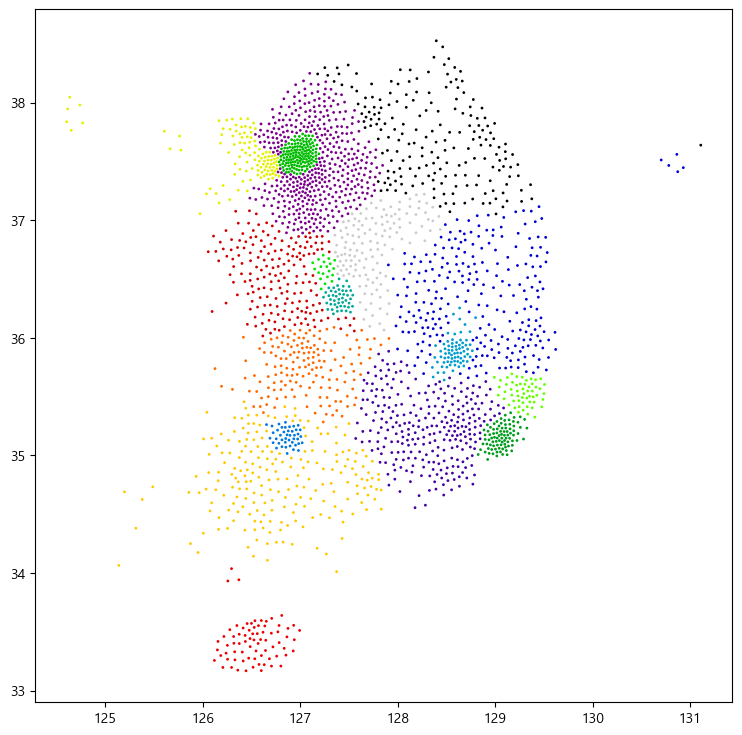

In [11]:
le = LabelEncoder()
region_encoded = le.fit_transform(ltc['ADDRESS_SIDO_NM'])

plt.figure(figsize=(9,9))
plt.scatter(ltc['GPS_X'], ltc['GPS_Y'], c=region_encoded, cmap='nipy_spectral', s=1)

In [34]:
# 첫 번째 단어 (형용사, 수식어)
first_words = [
    '따뜻한', '믿음', '친절한', '정직한', '든든한', '믿을만한', '안심', '행복한', '사려깊은', '보살피는',
    '배려하는', '건강한', '아름다운', '밝은', '미소짓는', '활기찬', '충실한',
    '포근한', '신뢰하는', '성실한', '상냥한', '희망찬', '부드러운', '열정적인', '헌신적인', '격려하는', 
    '세심한',  '믿음직한', '소중한', '효도하는', '온화한', '기분좋은'
]

# 두 번째 단어 (명사) - 중복 제거 및 추가
second_words = [
    '효', '모심', '돌봄', '사랑', '편안', '건강', '행복', '정성', '온기', '희망', '평안', '마음',
    '보살핌', '배려', '신뢰', '도움', '손길', '친절', '존중', '사랑의손길',
    '정성스러운', '믿음', '지원', '위로', '안식', '감동', '귀중함', '지지', 
    '감사', '응원', '위안'
]

# 세 번째 단어 (요양 서비스 관련 명사)
third_words = [
    '재가', '복지센터', '케어', '요양센터', '노인복지', '센터', '요양']

In [35]:
# 가능한 조합 리스트 생성
possible_names = []

# 중복 없이 조합을 생성
while len(possible_names) < 2500:
    # 조합 방식 선택 (first + second + third or second + third)
    if random.random() < 0.5:
        # first + second + third 조합
        first = random.choice(first_words)
        second = random.choice(second_words)
        third = random.choice(third_words)
        
        # first와 second에 같은 글자가 포함된 경우 건너뜀
        if any(char in second for char in first):
            continue
        
        company_name = f'{first}{second}{third}'
    else:
        # second + third 조합 (first 없이)
        second = random.choice(second_words)
        third = random.choice(third_words)
        
        # 중복된 조합을 피함
        company_name = f'{second}{third}'
    
    # 중복되지 않는 경우에만 추가
    if company_name not in possible_names:
        possible_names.append(company_name)


In [36]:

# DataFrame으로 변환
df = pd.DataFrame(possible_names, columns=['회사 이름'])

# 결과 출력
print(df)

# 필요시 엑셀 파일로 저장
# df.to_excel('company_names.xlsx', index=False)


              회사 이름
0         미소짓는귀중함재가
1        열정적인위안요양센터
2           정성스러운센터
3         충실한안식복지센터
4         소중한응원요양센터
...             ...
2495       효도하는응원센터
2496     행복한귀중함요양센터
2497       열정적인친절케어
2498       사려깊은도움케어
2499  부드러운사랑의손길복지센터

[2500 rows x 1 columns]


In [37]:
possible_names

['미소짓는귀중함재가',
 '열정적인위안요양센터',
 '정성스러운센터',
 '충실한안식복지센터',
 '소중한응원요양센터',
 '사랑재가',
 '상냥한도움요양센터',
 '친절노인복지',
 '상냥한모심요양',
 '위안케어',
 '안식요양센터',
 '정성재가',
 '소중한모심재가',
 '배려하는사랑의손길복지센터',
 '친절한도움요양센터',
 '효요양센터',
 '위로케어',
 '마음복지센터',
 '배려케어',
 '친절한존중케어',
 '감사요양센터',
 '귀중함노인복지',
 '부드러운모심케어',
 '소중한돌봄요양센터',
 '믿을만한정성요양센터',
 '아름다운신뢰요양센터',
 '정직한믿음요양',
 '희망요양센터',
 '감사요양',
 '소중한마음요양',
 '위로복지센터',
 '기분좋은건강요양',
 '열정적인손길요양',
 '미소짓는신뢰케어',
 '손길복지센터',
 '미소짓는편안케어',
 '포근한마음요양센터',
 '친절한보살핌복지센터',
 '격려하는위안재가',
 '온화한응원케어',
 '행복재가',
 '사랑요양센터',
 '상냥한효복지센터',
 '믿을만한지원복지센터',
 '믿음사랑의손길요양',
 '정성스러운요양센터',
 '모심요양센터',
 '효복지센터',
 '지원노인복지',
 '배려복지센터',
 '모심센터',
 '밝은위로요양',
 '정성요양센터',
 '든든한정성스러운복지센터',
 '행복센터',
 '든든한귀중함센터',
 '친절요양',
 '사랑노인복지',
 '손길노인복지',
 '지원케어',
 '미소짓는안식요양센터',
 '배려요양센터',
 '세심한귀중함요양',
 '포근한사랑의손길복지센터',
 '열정적인모심센터',
 '열정적인효요양센터',
 '마음센터',
 '포근한배려노인복지',
 '성실한친절복지센터',
 '따뜻한평안재가',
 '안심감사케어',
 '든든한온기복지센터',
 '온기케어',
 '효요양',
 '믿음요양센터',
 '성실한응원요양',
 '믿음재가',
 '소중한감동복지센터',
 '믿을만한행복복지센터',
 '마음케어',
 '믿을만한보살핌재가',
 '신뢰하는편안요양센터',
 '밝은위로요

In [38]:
ltc['LTC_NM'] = possible_names
ltc

,LTC_ID,PRS_CNT,GPS_X,GPS_Y,ADDRESS_SIDO_NM,LTC_NM
0,2-11674-00001,66,127.224122,37.390034,경기도,미소짓는귀중함재가
1,2-11674-00003,178,127.011455,37.651450,서울특별시,열정적인위안요양센터
2,2-11674-00004,28,127.579508,37.097537,경기도,정성스러운센터
3,2-11674-00005,49,126.481482,37.663736,인천광역시,충실한안식복지센터
4,2-11674-00007,37,127.196075,37.974927,경기도,소중한응원요양센터
...,...,...,...,...,...,...
2495,3-93751-00011,77,128.524026,35.895532,대구광역시,효도하는응원센터
2496,3-93751-00012,92,128.557807,35.824285,대구광역시,행복한귀중함요양센터
2497,3-93751-00013,95,128.584360,35.802019,대구광역시,열정적인친절케어
2498,3-93751-00015,97,128.560371,35.922970,대구광역시,사려깊은도움케어


In [39]:
ltc = ltc[['LTC_ID','LTC_NM','ADDRESS_SIDO_NM','PRS_CNT','GPS_X','GPS_Y']]
ltc

,LTC_ID,LTC_NM,ADDRESS_SIDO_NM,PRS_CNT,GPS_X,GPS_Y
0,2-11674-00001,미소짓는귀중함재가,경기도,66,127.224122,37.390034
1,2-11674-00003,열정적인위안요양센터,서울특별시,178,127.011455,37.651450
2,2-11674-00004,정성스러운센터,경기도,28,127.579508,37.097537
3,2-11674-00005,충실한안식복지센터,인천광역시,49,126.481482,37.663736
4,2-11674-00007,소중한응원요양센터,경기도,37,127.196075,37.974927
...,...,...,...,...,...,...
2495,3-93751-00011,효도하는응원센터,대구광역시,77,128.524026,35.895532
2496,3-93751-00012,행복한귀중함요양센터,대구광역시,92,128.557807,35.824285
2497,3-93751-00013,열정적인친절케어,대구광역시,95,128.584360,35.802019
2498,3-93751-00015,사려깊은도움케어,대구광역시,97,128.560371,35.922970


In [40]:
ltc.to_csv('ltc_dummy_data.csv')